# What is the best plan?
You work as an analyst for the telecommunications company Megaline. The company offers its customers prepaid plans, Surf and Ultimate. The sales department wants to know which plans generate more revenue in order to adjust the advertising budget.

You will conduct an initial analysis of the plans based on a small selection of customers. You will have data from 500 Megaline customers: who the customers are, where they are from, which plan they use, the number of calls they made, and the number of messages they sent in 2018. Your job is to analyze the customers' behavior and determine which prepaid plans generate more revenue.

## Initialization
With this project, we aim to answer the following question:

 - **Which prepaid plans generate more revenue? (in absolute and relative terms)**

The reason for answering this question is to better allocate advertising resources, ensuring that we are investing advertising resources in the prepaid plan with the highest revenue, maximizing the return on advertising expenditure.

##### Initial Steps
For each dataset provided, we will follow the following script:

1. Visualize the data in a general way using .info(), .describe(), and .head().
2. Identify possible anomalies/errors/issues in the data based on the analysis in step 1 and establish a general plan to address these points of concern.
3. Perform general data cleaning - remove duplicates, identify missing values, determine possible methods for handling missing values.
4. Check unique values for each categorical column in each dataset, identify anomalies/possible errors, and determine how to handle them.
5. Check values in numeric columns, observe for errors, anomalies, and correct them if necessary.

This concludes the data preparation and cleaning phase.

--------------------------------------------
##### Analysis Steps
For the analysis, we will look for relationships within the data, plot graphs, and use statistical methods to answer the project question as comprehensively and accurately as possible. The specific methods to be used will be determined as the project progresses.

In general, we will do the following:

1. Load libraries and datasets.
2. Prepare the data (fix errors/anomalies, perform cleaning).
3. Conduct descriptive statistical analysis of the data (mean, median, variance, standard deviation - histograms, distribution, graphs).
4. Hypothesis testing.
5. Overall analysis and conclusion.

In [2]:
# Loading Libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import math as math

## Loading Data

In [3]:
# Loading dataframes
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

In [3]:
# Loading dataframes
df_calls = pd.read_csv(r'C:\Users\Nicolas Kiessig\Downloads\Temp\megaline_calls.csv')


## Preparing Data

In [4]:
#Creating Dataset List.
sets_list = [df_calls, df_internet, df_messages, df_plans, df_users]
sets_list_names = ['df_calls', 'df_internet', 'df_messages', 'df_plans', 'df_users']

count = 0

for item in sets_list:
    print('DATASET', sets_list_names[count])
    item.info()
    display(item.head())
    print()
    print('------------SPLIT--------------')
    print()
    count += 1

DATASET df_calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22



------------SPLIT--------------

DATASET df_internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22



------------SPLIT--------------

DATASET df_messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26



------------SPLIT--------------

DATASET df_plans
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate



------------SPLIT--------------

DATASET df_users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN



------------SPLIT--------------



### Observations by dataset
**df_calls**

 - Change the data type of the call_date column from object to datetime.
 
**df_internet**

 - Change the data type of the session_date column from object to datetime.
 
**df_messages**

 - Change the data type of the message_date column from object to datetime.
 
**df_plans**

 - No identified issues.
 
**df_users**

 - Change the data type of the reg_date column from object to datetime.
 - Investigate churn_date.
 - Investigate age for possible anomalies.
 - Investigate city.

## Plans

In [5]:
# Printing general info o plans dataframe
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [6]:
# printing sample
display(df_plans.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Initially, we don't have any issues with the arrangement of this data.

## Correcting Data

We also don't have any obvious issues to fix.

## Enriching the Data

Let's add 3 columns with the information of how many messages, MBs, and minutes we are receiving per dollar paid in each plan. This is information that may be useful later on.

In [7]:
df_plans['msg_per_dollar'] = df_plans['messages_included']/df_plans['usd_monthly_pay']
df_plans['mb_per_dollar'] = df_plans['mb_per_month_included']/df_plans['usd_monthly_pay']
df_plans['min_per_dollar'] = df_plans['minutes_included']/df_plans['usd_monthly_pay']
display(df_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,msg_per_dollar,mb_per_dollar,min_per_dollar
0,50,15360,500,20,10,0.03,0.03,surf,2.500000,768.000000,25.000000
1,1000,30720,3000,70,7,0.01,0.01,ultimate,14.285714,438.857143,42.857143


We can already see here that in relative terms, if the customer values the internet plan more, they will be receiving almost double the amount of MBs per dollar in the Surf plan compared to the Ultimate plan.

## Users

In [8]:
# printing general info on users dataframe
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
# printing sample
display(df_users.head())
display(df_users.describe())
display(df_users['city'].value_counts())
df_users.duplicated().sum()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Oxnard-Thousand Oaks-Ventura, CA MSA                1
Greensboro-High Point, NC MSA                       1
Albany-Schenectady-Troy, NY MSA                     1
Jacksonville, FL MSA                                1
Stockton, CA MSA                                    1
Name: city, Length: 73, dtype: int64

0

As previously noted, here is what we need to address for this dataset:

 - Change the data type of the reg_date column from object to datetime.

 - Investigate churn_date. ---> For the NaN values here, let's fill them with a future date like x/x/2099 - this way, we can differentiate between actual churn and filled values.

 - Investigate age for possible anomalies. ---> No anomalies found (no negative age or extremely high age values).

 - Investigate city. ---> Initially, nothing seems wrong, but all rows have 'MSA' at the end (Metropolitan Statistical Area). After some research on Google, I found out that MSAs are a way the US government designates economically similar areas.

With this, we need to correct the reg_date column and fill in churn_date for the df_users dataset.

### Correct Data

Let's proceed with converting the data in the reg_date column to datetime and filling in the missing churn_dates accordingly.

In [10]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = df_users['churn_date'].fillna('2099-12-31')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Alright, now it seems we have the corrected data.

### Enrich the data

Let's add a column categorizing and aggregating the ages, one with the registration year, and one with the registration month.

In [11]:
#Age categories based on quartiles
def age_agg(row):
    user_age = row
    
    if user_age <= 30:
        return '18-30'
    if 46 >= user_age > 30:
        return '31-46'
    if 61 >= user_age > 46:
        return '47-61'
    if user_age > 61:
        return '62+'

df_users['age_group'] = df_users['age'].apply(age_agg)

#Year
df_users['reg_year'] = df_users['reg_date'].dt.year
#Month
df_users['reg_month'] = df_users['reg_date'].dt.month

#results
display(df_users)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,age_group,reg_year,reg_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2099-12-31,31-46,2018,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2099-12-31,18-30,2018,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2099-12-31,31-46,2018,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2099-12-31,47-61,2018,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2099-12-31,31-46,2018,5
...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2099-12-31,62+,2018,9
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2099-12-31,47-61,2018,2
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2099-12-31,47-61,2018,12
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2099-12-31,47-61,2018,2


## Calls

In [4]:
# printing general calls dataframe info
df_calls.info()
df_calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [13]:
# printing sample
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


No issues found in the call data overall, and no anomalies detected (such as negative duration, for example). We will simply change the data type of call_date to datetime.

### Correcting Data

In [14]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

### Enriching Data


Initially, let's add a column with the month of the calls. If it becomes necessary to add more features as the project progresses, we can do so. But for now, let's focus on adding the month column.

In [15]:
df_calls['month'] = df_calls['call_date'].dt.month
df_calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


## Messages

In [16]:
# printing messages dataframe general info
df_messages.info()
df_messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [17]:
# printing sample
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Here also, no major issues found. We just need to correct the message_date column by changing its data type from object to datetime.

### Correcting Data

In [18]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriching Data

Let's add a column with the month the message was sent.

In [19]:
df_messages['month'] = df_messages['message_date'].dt.month
df_messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [20]:
# printing general interenet dataframe data
df_internet.info()
df_internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [21]:
# printing sample
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


 Also, no anomalies or issues found initially.

### Correcting Data

Let's convert the session_date column to datetime.

In [22]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriching Data

Again, a month column could be useful here.

In [23]:
df_internet['month'] = df_internet['session_date'].dt.month
display(df_internet.head())

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


## Plans info

In [24]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,msg_per_dollar,mb_per_dollar,min_per_dollar
0,50,15360,500,20,10,0.03,0.03,surf,2.500000,768.000000,25.000000
1,1000,30720,3000,70,7,0.01,0.01,ultimate,14.285714,438.857143,42.857143


## Aggregated data per user

With the clean data, we can aggregate it by user and by period.

In [25]:
# Calculating the number of calls made by user, by month.

user_calls_per_month = df_calls.pivot_table(index='user_id',
                                            columns='month',
                                            values='id',
                                            aggfunc='count',
                                            fill_value=0)

user_calls_per_month = user_calls_per_month.stack().reset_index(name='calls')


display(user_calls_per_month)

,user_id,month,calls
0,1000,1,0
1,1000,2,0
2,1000,3,0
3,1000,4,0
4,1000,5,0
...,...,...,...
5767,1499,8,0
5768,1499,9,41
5769,1499,10,53
5770,1499,11,45


In [26]:
# Calculating spent minutes by user, by month.
user_minutes_per_month = df_calls.pivot_table(index = 'user_id',
                                              columns = 'month',
                                            values = 'duration',
                                            aggfunc = 'sum',
                                             fill_value = 0)

user_minutes_per_month = user_minutes_per_month.stack().reset_index(name='duration')

display(user_minutes_per_month)

,user_id,month,duration
0,1000,1,0.00
1,1000,2,0.00
2,1000,3,0.00
3,1000,4,0.00
4,1000,5,0.00
...,...,...,...
5767,1499,8,0.00
5768,1499,9,330.37
5769,1499,10,363.28
5770,1499,11,288.56


In [27]:
# Calculating number of sent messages per month, by user.
user_messages_per_month = df_messages.pivot_table(index = 'user_id',
                                              columns = 'month',
                                            values = 'message_date',
                                            aggfunc = 'count',
                                             fill_value = 0)

user_messages_per_month = user_messages_per_month.stack().reset_index(name='messages')

display(user_messages_per_month)

,user_id,month,messages
0,1000,1,0
1,1000,2,0
2,1000,3,0
3,1000,4,0
4,1000,5,0
...,...,...,...
4819,1497,8,0
4820,1497,9,0
4821,1497,10,0
4822,1497,11,0


In [28]:
# Calculating internet usage per month, by user.
user_internet_per_month = df_internet.pivot_table(index = 'user_id',
                                            columns = 'month',
                                            values = 'mb_used',
                                            aggfunc = 'sum',
                                                 fill_value = 0)

user_internet_per_month = user_internet_per_month.stack().reset_index(name='internet_mb')

display(user_internet_per_month)

,user_id,month,internet_mb
0,1000,1,0.00
1,1000,2,0.00
2,1000,3,0.00
3,1000,4,0.00
4,1000,5,0.00
...,...,...,...
5863,1499,8,0.00
5864,1499,9,12984.76
5865,1499,10,19492.43
5866,1499,11,16813.83


**Integrating the dataframes**

Now, let's integrate the datasets. We will have additional columns for each user, one column for each consumption category.

In [29]:
#Looking at which kind of merge we want to do, we don't want to lose any data.
print(len(user_calls_per_month['user_id'].unique()))
print(len(user_minutes_per_month['user_id'].unique()))
print(len(user_messages_per_month['user_id'].unique()))
print(len(user_internet_per_month['user_id'].unique()))

481
481
402
489


In [30]:
# Integrating all dataframes based on user_id and month
merged_data = (user_calls_per_month
               .merge(user_minutes_per_month, on=['user_id','month'], how = 'outer')
               .merge(user_messages_per_month, on=['user_id','month'], how = 'outer')
               .merge(user_internet_per_month, on=['user_id','month'], how = 'outer'))


display(merged_data)
print(merged_data.isna().sum())
merged_data = merged_data.fillna(0)
display(merged_data)

,user_id,month,calls,duration,messages,internet_mb
0,1000,1,0.0,0.0,0.0,0.00
1,1000,2,0.0,0.0,0.0,0.00
2,1000,3,0.0,0.0,0.0,0.00
3,1000,4,0.0,0.0,0.0,0.00
4,1000,5,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...
5875,1108,8,NaN,NaN,NaN,0.00
5876,1108,9,NaN,NaN,NaN,0.00
5877,1108,10,NaN,NaN,NaN,0.00
5878,1108,11,NaN,NaN,NaN,0.00


user_id           0
month             0
calls           108
duration        108
messages       1056
internet_mb      12
dtype: int64


,user_id,month,calls,duration,messages,internet_mb
0,1000,1,0.0,0.0,0.0,0.00
1,1000,2,0.0,0.0,0.0,0.00
2,1000,3,0.0,0.0,0.0,0.00
3,1000,4,0.0,0.0,0.0,0.00
4,1000,5,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...
5875,1108,8,0.0,0.0,0.0,0.00
5876,1108,9,0.0,0.0,0.0,0.00
5877,1108,10,0.0,0.0,0.0,0.00
5878,1108,11,0.0,0.0,0.0,0.00


In [31]:
len(merged_data['user_id'].unique())

490

We have 490 unique user_ids, not exceeding the initially selected 500. The merge seems to have been successful.

We replaced the missing values with 0 so that calculations can be performed with the cells.

In [32]:
df_plans = df_plans.rename(columns={'plan_name':'plan'})
display(df_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan,msg_per_dollar,mb_per_dollar,min_per_dollar
0,50,15360,500,20,10,0.03,0.03,surf,2.500000,768.000000,25.000000
1,1000,30720,3000,70,7,0.01,0.01,ultimate,14.285714,438.857143,42.857143


In [33]:
# Adding plan information
full_data = merged_data.merge(df_users, on = 'user_id').merge(df_plans, on = 'plan')
display(full_data.head())
print(full_data.columns)

,user_id,month,calls,duration,messages,internet_mb,first_name,last_name,age,city,...,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,msg_per_dollar,mb_per_dollar,min_per_dollar
0,1000,1,0.0,0.0,0.0,0.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,1000,30720,3000,70,7,0.01,0.01,14.285714,438.857143,42.857143
1,1000,2,0.0,0.0,0.0,0.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,1000,30720,3000,70,7,0.01,0.01,14.285714,438.857143,42.857143
2,1000,3,0.0,0.0,0.0,0.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,1000,30720,3000,70,7,0.01,0.01,14.285714,438.857143,42.857143
3,1000,4,0.0,0.0,0.0,0.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,1000,30720,3000,70,7,0.01,0.01,14.285714,438.857143,42.857143
4,1000,5,0.0,0.0,0.0,0.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,1000,30720,3000,70,7,0.01,0.01,14.285714,438.857143,42.857143


Index(['user_id', 'month', 'calls', 'duration', 'messages', 'internet_mb',
       'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'age_group', 'reg_year', 'reg_month', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'usd_monthly_pay',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'msg_per_dollar',
       'mb_per_dollar', 'min_per_dollar'],
      dtype='object')


Now, let's calculate the monthly revenue for each user.

In [34]:
# Calculating monthly revenue for each user
def month_rev(row):
    minutes = row['duration'] - row['minutes_included']
    messages = row['messages'] - row['messages_included']
    internet = row['internet_mb'] - row['mb_per_month_included']
    internet_round = math.ceil(internet/1024)
    
    if (row['calls'] == 0) and (row['duration'] == 0) and (row['messages'] == 0) and (row['internet_mb'] == 0):
        return 0
    
    if minutes > 0:
         minutes = minutes*row['usd_per_minute']
    if minutes < 0:
        minutes = 0
            
    if messages > 0:
        messages = messages*row['usd_per_message']
    if messages < 0:
        messages = 0
    
    if internet > 0:
        internet_round = internet_round*row['usd_per_gb']
    if internet < 0:
        internet_round = 0
    
    
    return minutes+messages+internet_round+row['usd_monthly_pay']

 

In [35]:
full_data['mon_rev'] = full_data.apply(lambda row: month_rev(row), axis=1)
display(full_data)

,user_id,month,calls,duration,messages,internet_mb,first_name,last_name,age,city,...,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,msg_per_dollar,mb_per_dollar,min_per_dollar,mon_rev
0,1000,1,0.0,0.0,0.0,0.00,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,30720,3000,70,7,0.01,0.01,14.285714,438.857143,42.857143,0.00
1,1000,2,0.0,0.0,0.0,0.00,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,30720,3000,70,7,0.01,0.01,14.285714,438.857143,42.857143,0.00
2,1000,3,0.0,0.0,0.0,0.00,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,30720,3000,70,7,0.01,0.01,14.285714,438.857143,42.857143,0.00
3,1000,4,0.0,0.0,0.0,0.00,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,30720,3000,70,7,0.01,0.01,14.285714,438.857143,42.857143,0.00
4,1000,5,0.0,0.0,0.0,0.00,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,30720,3000,70,7,0.01,0.01,14.285714,438.857143,42.857143,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,1349,8,0.0,0.0,0.0,0.00,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,15360,500,20,10,0.03,0.03,2.500000,768.000000,25.000000,0.00
5876,1349,9,0.0,0.0,0.0,0.00,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,15360,500,20,10,0.03,0.03,2.500000,768.000000,25.000000,0.00
5877,1349,10,0.0,0.0,76.0,13093.55,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,15360,500,20,10,0.03,0.03,2.500000,768.000000,25.000000,20.78
5878,1349,11,0.0,0.0,72.0,17128.26,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,15360,500,20,10,0.03,0.03,2.500000,768.000000,25.000000,40.66


## Studying consumer behavior

Let's take a look at the overall statistics of the complete dataset and then separate them by plan. But before that, we need to convert the 0s to NaN to avoid interfering with the statistical analysis.

In [36]:
full_data = full_data.replace(0, np.NaN)

sel_col_stats = ['calls','duration','messages','internet_mb','mon_rev']

full_data.info()
print()
print('ALL')
full_data[sel_col_stats].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5880 entries, 0 to 5879
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                5880 non-null   int64         
 1   month                  5880 non-null   int64         
 2   calls                  2258 non-null   float64       
 3   duration               2256 non-null   float64       
 4   messages               1806 non-null   float64       
 5   internet_mb            2277 non-null   float64       
 6   first_name             5880 non-null   object        
 7   last_name              5880 non-null   object        
 8   age                    5880 non-null   int64         
 9   city                   5880 non-null   object        
 10  reg_date               5880 non-null   datetime64[ns]
 11  plan                   5880 non-null   object        
 12  churn_date             5880 non-null   datetime64[ns]
 13  age

,calls,duration,messages,internet_mb,mon_rev
count,2258.000000,2256.000000,1806.000000,2277.000000,2293.000000
mean,60.998671,411.857385,42.110188,16882.197501,64.091110
std,31.770869,219.044839,33.122931,7869.784848,46.543456
min,1.000000,1.200000,1.000000,92.310000,20.000000
25%,39.000000,258.352500,17.000000,12347.720000,22.488200
50%,60.000000,404.360000,34.000000,16873.740000,70.000000
75%,80.000000,543.527500,59.000000,21041.520000,70.000000
max,205.000000,1431.220000,266.000000,70931.590000,588.637200


**Basic Descriptive Statistics: General Data**

 - We have some missing values in some columns now, but nothing obstructive.


 - The overall average number of calls per month in the year 2018, for these 500 customers in these 2 plans, was 61. It is very close to the median, which means we probably don't have any anomalous values here.


 - Average call duration: 412 minutes. Median, 404. They are also not too far apart, although there is a significant distance between the third quartile number (543) and the maximum number (1431).


 - Average number of messages: 42. Median, 34 - here we have a reasonable distance between the data, as we can see that the maximum number was 266 messages, while the third quartile is at 59. Therefore, this average of 42 is influenced by this outlier.


 - For internet usage, the mean and median are close.


 - The average monthly revenue per customer was 64, but with a large standard deviation (46), indicating that we have significant variations in revenue per customer. Nevertheless, in general, the mean and median are also close here.


 - Overall, we will use the means for subsequent studies, since despite the outliers, the means and medians are not too far apart.

In [37]:
#Descriptive stats for both plans for quick reference
surf_data = full_data.query('plan == "surf"')
ultimate_data = full_data.query('plan == "ultimate"')

print('SURF')
display(surf_data[sel_col_stats].describe())

print()

print('ULTIMATE')
display(ultimate_data[sel_col_stats].describe())

SURF


,calls,duration,messages,internet_mb,mon_rev
count,1545.000000,1544.000000,1222.000000,1558.000000,1573.000000
mean,60.895793,412.364793,40.109656,16717.702137,60.327346
std,31.268044,216.613902,33.035500,7884.682983,55.262605
min,1.000000,1.200000,1.000000,92.310000,20.000000
25%,40.000000,262.900000,16.000000,12187.955000,20.000000
50%,60.000000,405.925000,32.000000,16923.830000,40.150000
75%,80.000000,546.255000,54.000000,21039.860000,80.000000
max,205.000000,1431.220000,266.000000,70931.590000,588.637200



ULTIMATE


,calls,duration,messages,internet_mb,mon_rev
count,713.000000,712.000000,584.000000,719.000000,720.000000
mean,61.221599,410.757051,46.296233,17238.642253,72.313889
std,32.855296,224.376257,32.942118,7831.018323,11.395108
min,2.000000,8.730000,1.000000,233.170000,70.000000
25%,37.000000,248.712500,21.000000,12671.130000,70.000000
50%,61.000000,400.075000,41.000000,16863.450000,70.000000
75%,80.000000,535.205000,66.000000,21025.155000,70.000000
max,191.000000,1292.090000,166.000000,46595.330000,182.000000


**Basic Descriptive Statistics: Similarities and Differences between Plans**

 - Regarding the number of calls, there is almost no difference between the two plans.


 - In terms of call duration, there is also no significant difference.


 - As for messages, the mean and median are slightly higher for the Ultimate plan.


 - In terms of internet usage, there are no major differences either.


 - However, concerning revenue, it is interesting to note that in the Surf plan, there seems to be an outlier that significantly inflates the average, almost reaching the average of the Ultimate plan, even though Surf plans are much cheaper.

Now, let's delve into each item and visualize the data. We will adopt the following structure:

1. **Bar charts** to observe the monthly behavior of the metrics.
2. **Histograms** to understand the distribution of data for the metrics.
3. **Boxplots** to better compare the distribution of data between the plans.

### Calls

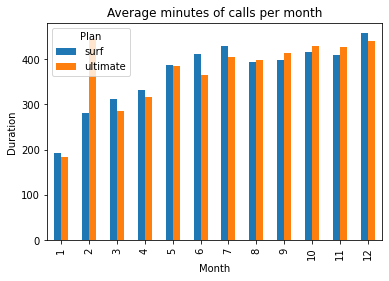

In [46]:
# Combining data from both plans
combined_data = pd.concat([surf_data, ultimate_data])

# Pivot the combined data to calculate the average duration for each month and plan
avg_duration = combined_data.pivot_table(index='month', columns='plan', values='duration')

# Plot the grouped bar chart
ax = avg_duration.plot(kind='bar')
ax.set_xlabel('Month')
ax.set_ylabel('Duration')
ax.set_title('Average minutes of calls per month')
ax.legend(title='Plan')

plt.show()


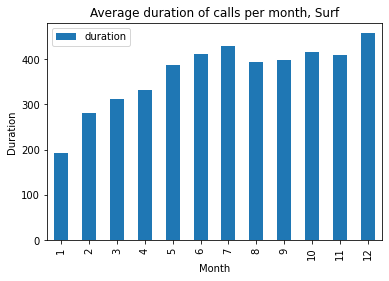

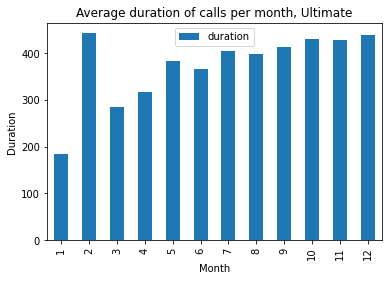

In [38]:
# comparing average call duration
s_avg = surf_data.pivot_table(index = 'month',
                     values = 'duration').plot(kind = 'bar')

plt.xlabel('Month')
plt.ylabel('Duration')
plt.title('Average duration of calls per month, Surf')
plt.show()

u_avg = ultimate_data.pivot_table(index = 'month',
                     values = 'duration').plot(kind = 'bar')

plt.xlabel('Month')
plt.ylabel('Duration')
plt.title('Average duration of calls per month, Ultimate')
plt.show()

We do not see significant differences in the average call duration between the two plans throughout the months. What can be emphasized is the gradual increase in this average over time, but this could be related to the records - at the beginning of the year, we had fewer customers and fewer values to calculate the average. This might be the case for month 2 in the Ultimate plan chart. There is an outlier there that significantly pulled up the overall average for that month.

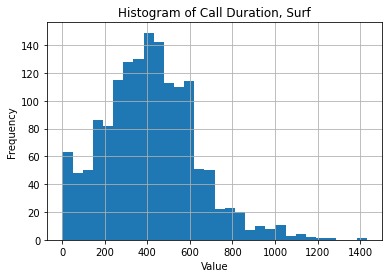

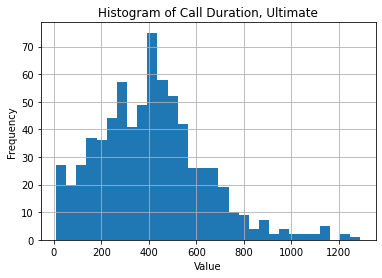

In [39]:
# comparing number of minutes needed, frequency
surf_data['duration'].hist(bins = 30)
plt.title('Histogram of Call Duration, Surf')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()



ultimate_data['duration'].hist(bins = 30)
plt.title('Histogram of Call Duration, Ultimate')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

The distribution of minutes between the two plans is also similar, with the majority of values falling between 200 and 600 minutes per month. The most frequent value is close to 400 minutes, which aligns with the overall average in both plans according to the general descriptive statistics.

In [40]:
# Calcule a média e a variação da duração mensal das chamadas
surf_dur_mean = surf_data['duration'].mean()
surf_dur_var = np.var(surf_data['duration'])

print("Surf call duration mean: {:.0f}".format(surf_dur_mean))
print("Surf call duration variance: {:.0f}".format(surf_dur_var))

print()

ult_dur_mean = ultimate_data['duration'].mean()
ult_dur_var = np.var(ultimate_data['duration'])

print("Ultimate call duration mean: {:.0f}".format(ult_dur_mean))
print("Ultimate call duration variance: {:.0f}".format(ult_dur_var))

Surf call duration mean: 412
Surf call duration variance: 46891

Ultimate call duration mean: 411
Ultimate call duration variance: 50274


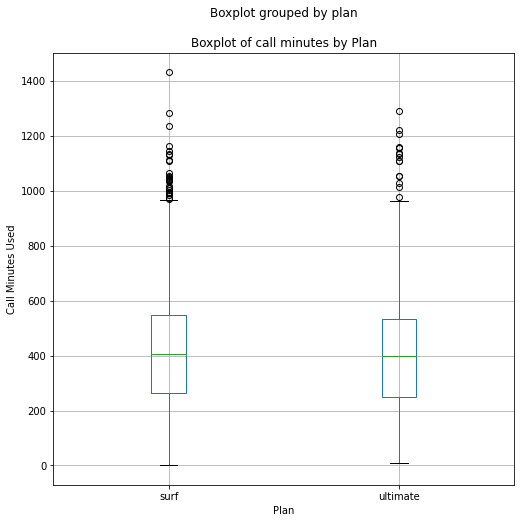

In [41]:
full_data.boxplot(column = 'duration', by = 'plan', figsize = (8,8))
plt.title('Boxplot of call minutes by Plan')
plt.xlabel('Plan')
plt.ylabel('Call Minutes Used')
plt.show()

We can observe that the behavior of users between the plans regarding call duration is quite similar, with almost identical boxplots. The only notable difference is that the Surf plan seems to have more values considered outliers according to the interquartile range method.

### Messages

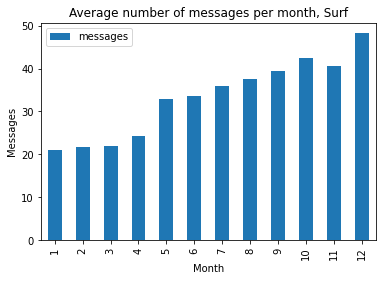

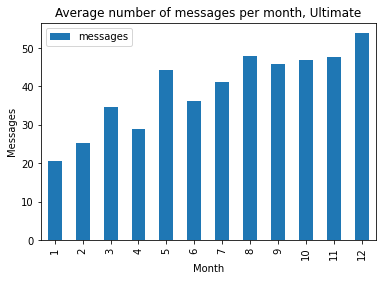

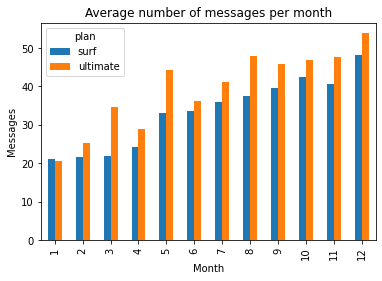

In [50]:
sm_avg = surf_data.pivot_table(index = 'month',
                     values = 'messages').plot(kind = 'bar')

plt.xlabel('Month')
plt.ylabel('Messages')
plt.title('Average number of messages per month, Surf')
plt.show()

um_avg = ultimate_data.pivot_table(index = 'month',
                     values = 'messages').plot(kind = 'bar')

plt.xlabel('Month')
plt.ylabel('Messages')
plt.title('Average number of messages per month, Ultimate')
plt.show()

full_data.pivot_table(index = 'month', columns = 'plan', values = 'messages').plot(kind = 'bar')
plt.xlabel('Month')
plt.ylabel('Messages')
plt.title('Average number of messages per month')
plt.show()

There are no significant differences here, except that users on the Ultimate plan seem to have a slightly higher variance than the Surf plan for the number of messages sent.

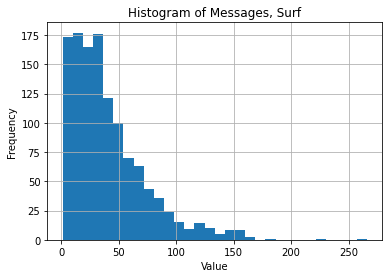

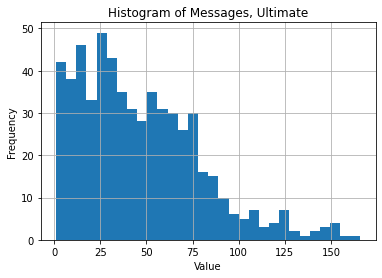

In [42]:
#Histograms for messages sent
surf_data['messages'].hist(bins = 30)
plt.title('Histogram of Messages, Surf')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()



ultimate_data['messages'].hist(bins = 30)
plt.title('Histogram of Messages, Ultimate')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Here we can observe something interesting: the majority of users on the Surf plan send fewer than 60 messages per month, and there seems to be a concentration within the range of less than 50. The same cannot be said for users on the Ultimate plan. In this case, the distribution of the number of messages sent per month is more spread out and less concentrated, indicating a higher standard deviation for these data points in the Ultimate plan compared to the Surf plan.

In other words, in the Surf plan, most of the data is concentrated around the mean, while in the Ultimate plan, it is not as much. Referring back to the initial descriptive data analysis, the average number of messages sent by the Ultimate plan is indeed higher than that of the Surf plan, with a slightly higher standard deviation. It might have been substantially higher if we removed the message outliers in the Surf plan, as this would reduce its standard deviation. However, it is not necessary to do so, as we can observe these differences here.

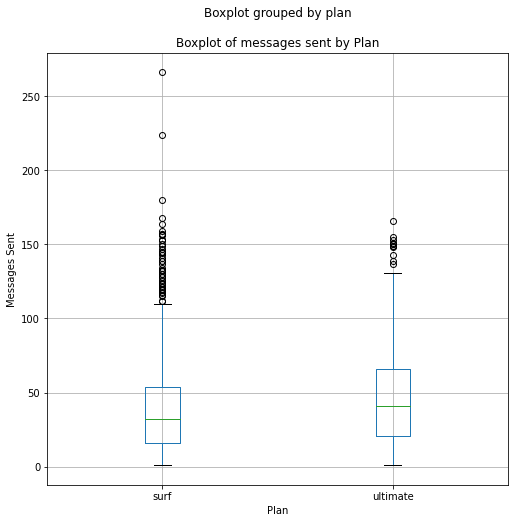

In [43]:
#Boxplots messages
full_data.boxplot(column = 'messages', by = 'plan', figsize = (8,8))
plt.title('Boxplot of messages sent by Plan')
plt.xlabel('Plan')
plt.ylabel('Messages Sent')
plt.show()

Now we can see what we discussed in the previous graph: we notice that the whiskers of the boxplot for the Ultimate plan are indeed larger than those of the Surf plan, and that the Surf plan has significantly more outliers when considering the interquartile range method.

 - In summary: Users on the Surf plan send fewer messages than users on the Ultimate plan, and users on the Ultimate plan exhibit more variation in the number of messages they send.

### Internet

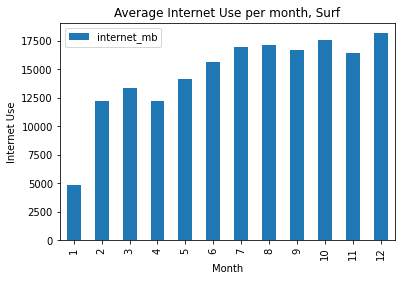

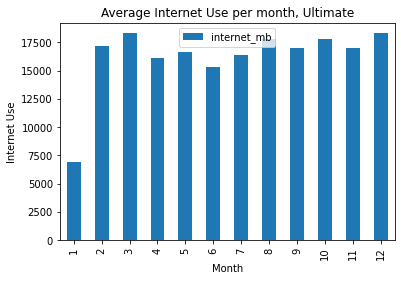

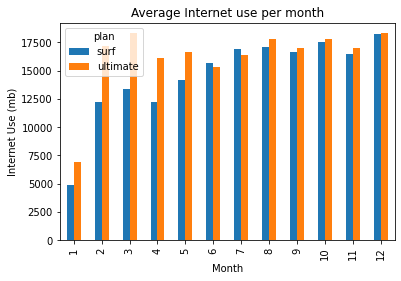

In [52]:
si_avg = surf_data.pivot_table(index = 'month',
                     values = 'internet_mb').plot(kind = 'bar')

plt.xlabel('Month')
plt.ylabel('Internet Use')
plt.title('Average Internet Use per month, Surf')
plt.show()

ui_avg = ultimate_data.pivot_table(index = 'month',
                     values = 'internet_mb').plot(kind = 'bar')

plt.xlabel('Month')
plt.ylabel('Internet Use')
plt.title('Average Internet Use per month, Ultimate')
plt.show()

full_data.pivot_table(index = 'month', columns = 'plan', values = 'internet_mb').plot(kind = 'bar')
plt.xlabel('Month')
plt.ylabel('Internet Use (mb)')
plt.title('Average Internet use per month')
plt.show()

The average internet usage per month between the plans differs in the first half of the year: it is higher in the Ultimate plan compared to the Surf plan. However, the average internet usage becomes similar for both plans in the second half of the year.

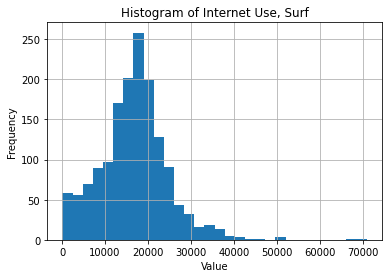

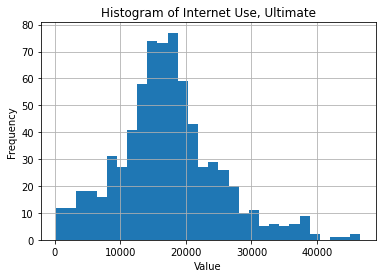

In [45]:
#Histograms Internet
surf_data['internet_mb'].hist(bins = 30)
plt.title('Histogram of Internet Use, Surf')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()



ultimate_data['internet_mb'].hist(bins = 30)
plt.title('Histogram of Internet Use, Ultimate')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

We can observe that the shape of the distribution of internet usage in both plans is relatively similar, but there is an important point to highlight:

 - The distribution curve of values in the Surf plan is slightly sharper, indicating a smaller standard deviation compared to the Ultimate plan. However, it's worth noting that the Surf plan has an outlier that is affecting the calculation of the standard deviation for that plan.
 
 
Nevertheless, we can see that the standard deviation for internet usage in the Ultimate plan is slightly higher. Referring back to the earlier descriptive statistics, we also note that the medians for both plans are similar - comparing the medians helps mitigate the effect of outliers on the means.

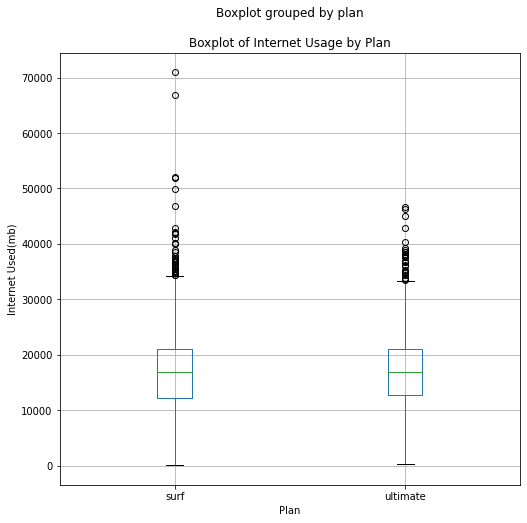

In [46]:
#Boxplots Internet
full_data.boxplot(column = 'internet_mb', by = 'plan', figsize = (8,8))
plt.title('Boxplot of Internet Usage by Plan')
plt.xlabel('Plan')
plt.ylabel('Internet Used(mb)')
plt.show()

Overall, the behavior of internet usage among users in each plan does not differ significantly. We do notice that the Surf plan has two outliers that are considerably higher than the other outliers. Let's try constructing the same boxplot but without those two upper outliers from the Surf plan and see if there is a notable difference.

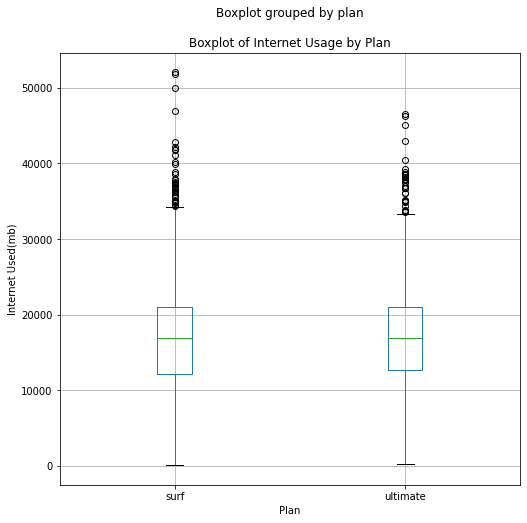

In [47]:
#boxplot sem outliers Surf
full_data.query('internet_mb < 60000').boxplot(column = 'internet_mb', by = 'plan', figsize = (8,8))
plt.title('Boxplot of Internet Usage by Plan')
plt.xlabel('Plan')
plt.ylabel('Internet Used(mb)')
plt.show()

Even without those two major outliers, we do not see significant differences in internet usage between the two plans. The data still indicates a similar distribution and overall behavior for internet usage in both plans.

## Revenue

In [48]:
#General Stats
print('SURF REV')
display(surf_data['mon_rev'].describe())
print('ULTIMATE REV')
display(ultimate_data['mon_rev'].describe())



SURF REV


count    1573.000000
mean       60.327346
std        55.262605
min        20.000000
25%        20.000000
50%        40.150000
75%        80.000000
max       588.637200
Name: mon_rev, dtype: float64

ULTIMATE REV


count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: mon_rev, dtype: float64

We observed two points here:

1. The average monthly revenue between the plans is relatively close, but the standard deviation is not. The Ultimate plan has a much lower variance compared to the Surf plan.

2. The Surf plan has a significant outlier as the maximum value, which may be affecting the standard deviation. We will further examine this with histogram and boxplot graphs.

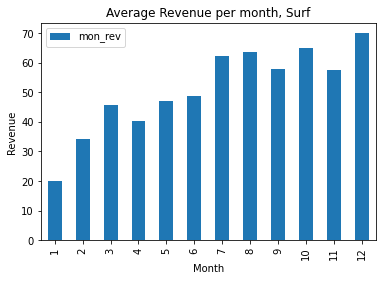

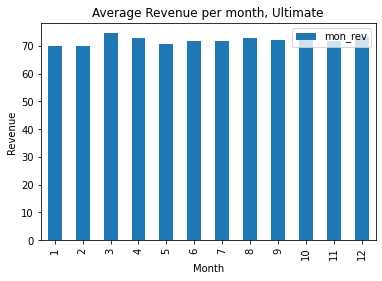

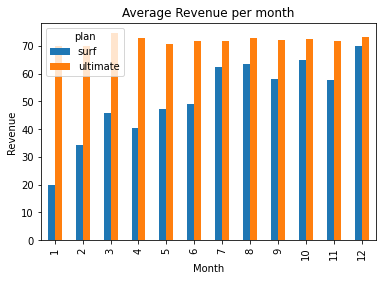

In [53]:
#Bar Chart
sr_avg = surf_data.pivot_table(index = 'month',
                     values = 'mon_rev').plot(kind = 'bar')

plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Average Revenue per month, Surf')
plt.show()

ur_avg = ultimate_data.pivot_table(index = 'month',
                     values = 'mon_rev').plot(kind = 'bar')

plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Average Revenue per month, Ultimate')
plt.show()

full_data.pivot_table(index = 'month', columns = 'plan', values = 'mon_rev').plot(kind = 'bar')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Average Revenue per month')
plt.show()

The first observation here is that the average monthly revenue varies much less for the Ultimate plan compared to the Surf plan, as previously noted in the general descriptive statistics. It's important to highlight that since the limits for adding variable costs to the monthly plan in the Ultimate plan are much higher than those in the Surf plan, this makes sense. In summary, the Surf plan adds variability to the company's revenue, while the Ultimate plan adds stability.

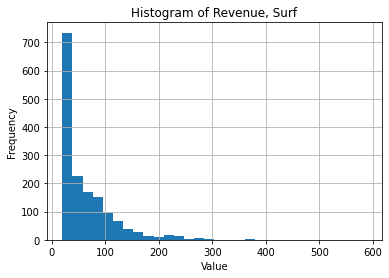

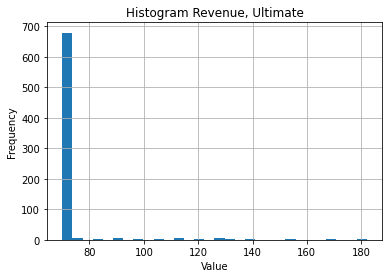

In [50]:
#Revenue histograms
surf_data['mon_rev'].hist(bins = 30)
plt.title('Histogram of Revenue, Surf')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()



ultimate_data['mon_rev'].hist(bins = 30)
plt.title('Histogram Revenue, Ultimate')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

We can observe that the revenue from the Surf plan is more varied than that of the Ultimate plan, especially when considering the concentration of values. Both plans exhibit concentration around the plan value, but the Surf plan has a higher frequency of values different from the plan value compared to the Ultimate plan.

In summary, the Ultimate plan has less varied revenue compared to the Surf plan, and the Surf plan has outliers that are far outside the usual values.

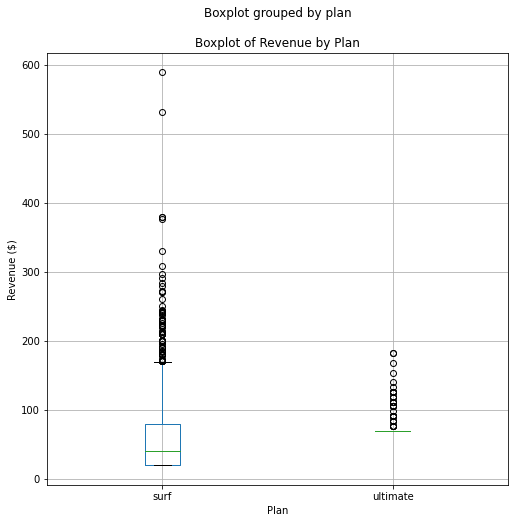

In [51]:
#Boxplots
full_data.boxplot(column = 'mon_rev', by = 'plan', figsize = (8,8))
plt.title('Boxplot of Revenue by Plan')
plt.xlabel('Plan')
plt.ylabel('Revenue ($)')
plt.show()

As noted earlier, here we have a more visual way to see this: the Surf plan has a larger standard deviation, a larger interquartile range, and even with that, it has more outliers compared to the Ultimate plan.

 - To summarize what we have analyzed regarding revenue in both plans, we can conclude that the revenue the company receives from the Ultimate plan is much more stable and less volatile than the revenue from the Surf plan. Additionally, the median revenue of the Ultimate plan is higher than the median revenue of the Surf plan (70 vs 40, respectively) - here again, comparing medians to mitigate the effect of outliers on the means when making the comparison.

## Testing statistical hypothesis

To answer the initial question that the project proposed regarding which plan brings more revenue to the company on average, let's develop some hypotheses and test them.

1. The first hypothesis to test is that the average revenue of users in the Ultimate and Surf plans is different.
 - Null Hypothesis (H0): The average revenue of the Ultimate plan = The average revenue of the Surf plan.
 - Alternative Hypothesis (HA): The average revenue of the Ultimate plan ≠ The average revenue of the Surf plan.
 
 
Let's conduct this test first without removing the two major outliers from the Surf plan (both with revenue > 500), and then by removing these outliers.

In [52]:
# Testing hypothesis
rev_ultimate = ultimate_data['mon_rev'].dropna()
rev_surf = surf_data['mon_rev'].dropna()

# Checando se as variâncias podem ser consideradas iguais
print('Rev Ultimate Var:',np.var(rev_ultimate))
print('Rev Surf Var:',np.var(rev_surf))
print('As variâncias não podem ser consideradas iguas, vamos usar equal_var = False')

#Queremos ter 95% de confiança de que a média de receita de um plano é diferente da do outro, então usaremos um alpha de 5%
alpha = 0.05

results = st.ttest_ind(
    rev_ultimate,
    rev_surf,
    equal_var = False)

print()
print('p-value: ', results.pvalue)
print('alpha:', alpha)

if results.pvalue < alpha:
    print('Rejeitamos a hipótese nula')

if results.pvalue > alpha:
    print('Não podemos rejeitar a hipótese nula')


Rev Ultimate Var: 129.66814043209877
Rev Surf Var: 3052.013980691246
As variâncias não podem ser consideradas iguas, vamos usar equal_var = False

p-value:  3.5320199509520717e-16
alpha: 0.05
Rejeitamos a hipótese nula


In [53]:
# testing hypothesis, without 2 big outlier values in Surf

rev_ultimate = ultimate_data['mon_rev'].dropna()
rev_surf = surf_data.loc[surf_data['mon_rev'] < 500,'mon_rev'].dropna()

# Checando se as variâncias podem ser consideradas iguais
print('Rev Ultimate Var:',np.var(rev_ultimate))
print('Rev Surf Var:',np.var(rev_surf))
print('As variâncias não podem ser consideradas iguas, vamos usar equal_var = False')

#Queremos ter 95% de confiança de que a média de receita de um plano é diferente da do outro, então usaremos um alpha de 5%
alpha = 0.05

results = st.ttest_ind(
    rev_ultimate,
    rev_surf,
    equal_var = False)

print()
print('p-value: ', results.pvalue)
print('alpha:', alpha)

if results.pvalue < alpha:
    print('Rejeitamos a hipótese nula')

if results.pvalue > alpha:
    print('Não podemos rejeitar a hipótese nula')


Rev Ultimate Var: 129.66814043209877
Rev Surf Var: 2736.5703750728776
As variâncias não podem ser consideradas iguas, vamos usar equal_var = False

p-value:  2.2189363082227653e-19
alpha: 0.05
Rejeitamos a hipótese nula


Statistically speaking, we can reject the null hypothesis that the average revenue of the Ultimate and Surf plans is the same. This suggests that there is a significant difference in the average revenue between the two plans.

To test the second hypothesis, we will compare the average revenue from users in the NY-NJ region with the average revenue from users in other regions.

 - Null Hypothesis (H0): Average revenue from NY-NJ = Average revenue from other regions.
 - Alternative Hypothesis (HA): Average revenue from NY-NJ ≠ Average revenue from other regions.
 
To proceed with the analysis, we will need the data for revenue from users in the NY-NJ region and users in other regions.

In [54]:
#Filtering NY-NJ sample
NY_NJ_sample = full_data[full_data['city'].str.contains('NY-NJ')].dropna()
others_sample = full_data[~full_data['city'].str.contains('NY-NJ')].dropna()

print('NY-NJ mean: ',NY_NJ_sample['mon_rev'].mean())
print('Other regions mean: ',others_sample['mon_rev'].mean())
print()
print('NY-NJ variance: ',np.var(NY_NJ_sample['mon_rev']))
print('Other regions variance: ',np.var(others_sample['mon_rev']))
print('Vamos considerar as variâncias iguais nesse primeiro momento, mas rodar os testes de ambas maneiras')


# We want 95% confidence, so we'll use 5% alpha
alpha = 0.05


#Considering equal_var = True
results = st.ttest_ind(
    NY_NJ_sample['mon_rev'],
    others_sample['mon_rev'],
    equal_var = True)

print()
print('equal_var = True')
print('p-value: ', results.pvalue)
print('alpha:', alpha)
print()


if results.pvalue < alpha:
    print('Rejeitamos a hipótese nula')

if results.pvalue > alpha:
    print('Não podemos rejeitar a hipótese nula')
    
    
#Considering equal_var = False
results = st.ttest_ind(
    NY_NJ_sample['mon_rev'],
    others_sample['mon_rev'],
    equal_var = False)

print()
print('equal_var = False')
print('p-value: ', results.pvalue)
print('alpha:', alpha)
print()


if results.pvalue < alpha:
    print('Rejeitamos a hipótese nula')

if results.pvalue > alpha:
    print('Não podemos rejeitar a hipótese nula')





NY-NJ mean:  57.641409712230214
Other regions mean:  65.23592918918919

NY-NJ variance:  1511.2549616650492
Other regions variance:  2068.8203544961343
Vamos considerar as variâncias iguais nesse primeiro momento, mas rodar os testes de ambas maneiras

equal_var = True
p-value:  0.009154773419264925
alpha: 0.05

Rejeitamos a hipótese nula

equal_var = False
p-value:  0.003912929000719422
alpha: 0.05

Rejeitamos a hipótese nula


Based on the analysis conducted with a 95% confidence level, we can conclude that the average revenue from the NY-NJ region is statistically different from the average revenue from other regions.

## General Conclusion

It has been a long journey to get here, and the objective of the project has been achieved, as we are now able to confidently answer the initial question that sparked this project:

**Which prepaid plan generates more revenue?**

 - And the answer is that the average revenue of the Ultimate plan is higher than the average revenue of the Surf plan, and we have 95% confidence that the means are statistically different, indicating that there is indeed a difference in the average revenue between the plans.
 
 
We were also able to answer another question: **Is the average revenue of the NY-NJ region different from the average revenue of the other regions?**

 - The answer is yes, with 95% confidence, there is a difference between the average revenue of the NY-NJ region and the other regions.
 
 
**General Summary of Decisions Made**

 - First, we took a general look at the data, searching for three things: duplicates, missing values, and anomalous (quantitative) / incorrect (categorical) values. We chose to keep the dataset as intact as possible.
 - We integrated the various separate datasets into a single dataset, full_data, and worked from there.
 - We calculated the monthly revenue for the various metrics.
 - We structured a standard analysis for the various metrics (bar charts, histograms, boxplots).
 - We studied the influence of outliers on the results by generating results with and without some outliers for comparison.
 - We performed statistical tests to answer the project's question.
 
**Final Remarks**

There is still room to explore the data further, but for now, the objective of the project has been completed. We encountered some setbacks, especially in integrating the datasets - I had initially produced the intermediate data with months as columns instead of a single column for months. It took me some time to revisit my code and make that alteration, which would allow me to proceed with the integration of the datasets, but I eventually succeeded.